# using CNN (convolutional neural networks) to enhance the performance of the DNN on fashion mnist

In [1]:
# import the needed libraries
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist as mnist
import matplotlib.pyplot as plt
done = "Done"
print(done)

Done


In [2]:
# callback function
class CallBack(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    acc = 0.998
    if logs.get('accuracy') > acc:
      print(f'\nReached training accuracy of {acc}. Stopping training')
      self.model.stop_training = True


In [6]:
# show the version of tensorflow in use
print(tf.__version__)

2.10.0


In [7]:
# load the data (download the dataset) from fashion mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)

4422102/4422102 [==============================] - 2s 0us/step
(60000, 28, 28)


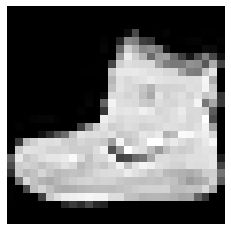

In [8]:
# explore the data 
image = train_images[0]
plt.gray()
plt.axis('off')
plt.grid(False)
plt.imshow(image, cmap='gray')
plt.show()

In [9]:
# reshape the images
train_images = train_images.reshape(60000, 28,28,1)
test_images = test_images.reshape(10000, 28,28,1)
print(train_images.shape)

(60000, 28, 28, 1)


In [10]:
# normalize images 
train_images = train_images / 255.0
test_images= test_images / 255.0
print(done)

Done


In [11]:
# create the model
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), input_shape=(28,28,1), activation='relu'),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
print(done)

Done


In [12]:
# show some model statistics
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [13]:
# compile the model
model.compile(
    optimizer='Adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
print(done)

Done


In [14]:
callBacks = CallBack()
model.fit(train_images, train_labels, epochs=10, callbacks=[callBacks]) # callbacks=[callBacks]

Epoch 1/10
1875/1875 [==============================] - 83s 43ms/step - loss: 0.4472 - accuracy: 0.8368
Epoch 2/10
1875/1875 [==============================] - 84s 45ms/step - loss: 0.2993 - accuracy: 0.8908
Epoch 3/10
1875/1875 [==============================] - 88s 47ms/step - loss: 0.2542 - accuracy: 0.9069
Epoch 4/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.2202 - accuracy: 0.9186
Epoch 5/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.1915 - accuracy: 0.9290
Epoch 6/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.1683 - accuracy: 0.9365
Epoch 7/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.1500 - accuracy: 0.9444
Epoch 8/10
1875/1875 [==============================] - 84s 45ms/step - loss: 0.1296 - accuracy: 0.9518
Epoch 9/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.1170 - accuracy: 0.9548
Epoch 10/10
1875/1875 [==============================] - 84s 45m

In [16]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 5s 14ms/step - loss: 0.3127 - accuracy: 0.9093


[0.3127259910106659, 0.9093000292778015]

In [17]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


1/1 [==============================] - 0s 52ms/step


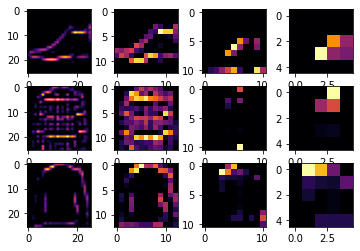

In [18]:
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)